In [93]:
### Load necessary modules -------------------------------
# interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
from sklearn.model_selection import train_test_split

In [94]:
df = pd.read_csv('FICO_dataset_reduced_MOD.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5245 non-null   float64
 1   ExternalRiskEstimate          7442 non-null   int64  
 2   NetFractionRevolvingBurden    7442 non-null   int64  
 3   AverageMInFile                7442 non-null   int64  
 4   MSinceOldestTradeOpen         7415 non-null   float64
 5   PercentTradesWBalance         7386 non-null   float64
 6   PercentInstallTrades          7442 non-null   int64  
 7   NumSatisfactoryTrades         7425 non-null   float64
 8   NumTotalTrades                7419 non-null   float64
 9   PercentTradesNeverDelq        7442 non-null   int64  
 10  MSinceMostRecentInqexcl7days  7442 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 639.7 KB


In [95]:
df.isna().sum()

RiskPerformance                 2197
ExternalRiskEstimate               0
NetFractionRevolvingBurden         0
AverageMInFile                     0
MSinceOldestTradeOpen             27
PercentTradesWBalance             56
PercentInstallTrades               0
NumSatisfactoryTrades             17
NumTotalTrades                    23
PercentTradesNeverDelq             0
MSinceMostRecentInqexcl7days       0
dtype: int64

In [96]:
# Drop the rows where RiskPerformance is missing
df = df.dropna(subset=['RiskPerformance'])
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5245 non-null   float64
 1   ExternalRiskEstimate          5245 non-null   int64  
 2   NetFractionRevolvingBurden    5245 non-null   int64  
 3   AverageMInFile                5245 non-null   int64  
 4   MSinceOldestTradeOpen         5218 non-null   float64
 5   PercentTradesWBalance         5189 non-null   float64
 6   PercentInstallTrades          5245 non-null   int64  
 7   NumSatisfactoryTrades         5228 non-null   float64
 8   NumTotalTrades                5222 non-null   float64
 9   PercentTradesNeverDelq        5245 non-null   int64  
 10  MSinceMostRecentInqexcl7days  5245 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 491.7 KB
Index(['RiskPerformance', 'ExternalRiskEstimate', 'NetFractionRevolvingBurden',

       RiskPerformance  ExternalRiskEstimate  NetFractionRevolvingBurden  \
count      5245.000000           5245.000000                 5245.000000   
mean          0.510391             71.103718                   34.584747   
std           0.499940             12.535667                   29.076478   
min           0.000000             -9.000000                   -9.000000   
25%           0.000000             64.000000                    9.000000   
50%           1.000000             72.000000                   29.000000   
75%           1.000000             80.000000                   56.000000   
max           1.000000             93.000000                  232.000000   

       AverageMInFile  MSinceOldestTradeOpen  PercentTradesWBalance  \
count     5245.000000            5218.000000            5189.000000   
mean        77.130219             200.537371              65.558104   
std         33.535254              99.271158              22.759062   
min         -9.000000          

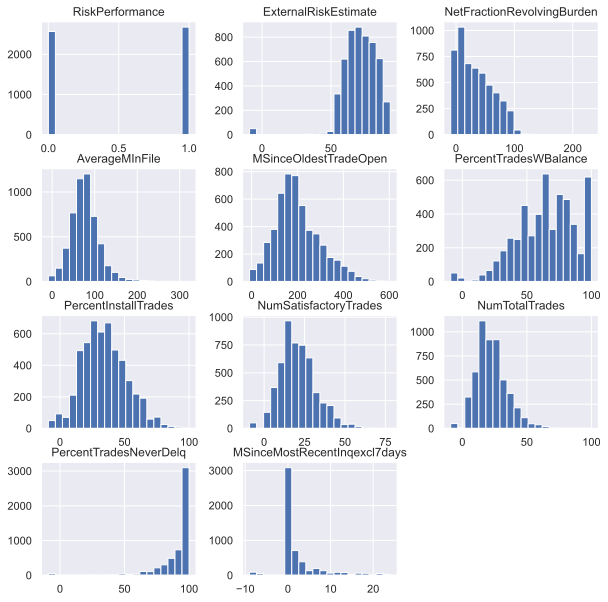

In [97]:
df.hist(figsize=(10,10), bins=20)
print(df.describe())
plt.show()

In [98]:
df.shape

(5245, 11)

In [99]:
# Put all negative numbers to na
df[df < 0] = np.nan

# Put the column RiskPerformance as a category
df['RiskPerformance'] = df['RiskPerformance'].astype('category')
df.shape

(5245, 11)

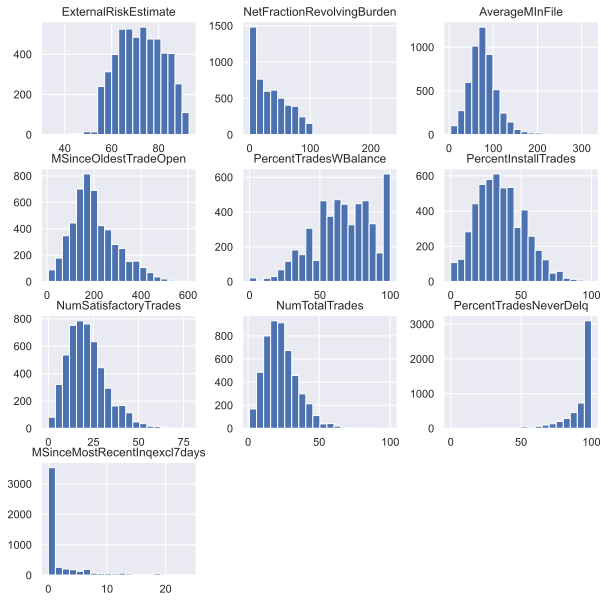

In [101]:
df.hist(figsize=(10,10), bins=20)
plt.show()

In [81]:
# Class count
df['RiskPerformance'].value_counts()
# It is a balanced dataset

RiskPerformance
1.0    2677
0.0    2568
Name: count, dtype: int64

In [82]:
# Define input and output matrices
INPUTS = ['ExternalRiskEstimate', 'NetFractionRevolvingBurden',
       'AverageMInFile', 'MSinceOldestTradeOpen', 'PercentTradesWBalance',
       'PercentInstallTrades', 'NumSatisfactoryTrades', 'NumTotalTrades',
       'PercentTradesNeverDelq', 'MSinceMostRecentInqexcl7days']
OUTPUT = 'RiskPerformance'


In [83]:
df.isna().sum()

RiskPerformance                   0
ExternalRiskEstimate             50
NetFractionRevolvingBurden       61
AverageMInFile                   50
MSinceOldestTradeOpen            78
PercentTradesWBalance           107
PercentInstallTrades             50
NumSatisfactoryTrades            67
NumTotalTrades                   73
PercentTradesNeverDelq           50
MSinceMostRecentInqexcl7days    139
dtype: int64

In [84]:
# Drop all rows with na in all columns but the one called RiskPerformance
df = df.dropna(subset=INPUTS, how='all')

In [86]:
# Show the first 5 lines that contain a nan value
df[df.isna().any(axis=1)].head()

,RiskPerformance,ExternalRiskEstimate,NetFractionRevolvingBurden,AverageMInFile,MSinceOldestTradeOpen,PercentTradesWBalance,PercentInstallTrades,NumSatisfactoryTrades,NumTotalTrades,PercentTradesNeverDelq,MSinceMostRecentInqexcl7days
19,1.0,57.0,44.0,73.0,147.0,56.0,48.0,27.0,NaN,97.0,0.0
20,1.0,72.0,49.0,83.0,365.0,73.0,41.0,22.0,NaN,100.0,0.0
21,0.0,72.0,43.0,53.0,84.0,64.0,27.0,29.0,NaN,100.0,0.0
22,1.0,65.0,14.0,45.0,88.0,50.0,20.0,20.0,NaN,85.0,0.0
23,1.0,64.0,24.0,55.0,91.0,82.0,50.0,19.0,NaN,90.0,0.0


In [87]:
X = df[INPUTS]
Y = df[OUTPUT]

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=2023, #seed for replication
                                                    stratify = Y)   #Preserves distribution of y. Same proportion. useful for classification but not for regression problemas

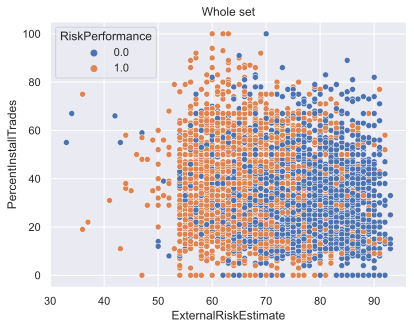

In [89]:
### Exploratory analysis -------------------------------------------------------------------------------------
# Scatterplot between two varaibles. Hue --> Color of dots
sns.scatterplot(x = 'ExternalRiskEstimate', y = 'PercentInstallTrades', hue = 'RiskPerformance', data = df).set_title("Whole set")
plt.show()

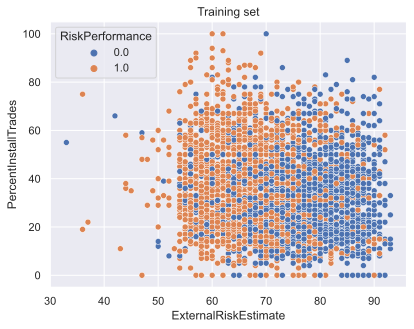

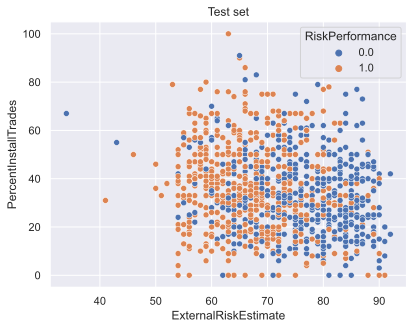

In [90]:
## Create dataset to store model predictions
dfTR_eval = X_train.copy()
dfTR_eval['RiskPerformance'] = Y_train # We will call Y as output variable for simplicity
dfTS_eval = X_test.copy()
dfTS_eval['RiskPerformance'] = Y_test # We will call Y as output variable for simplicity

## Plot training and test sets. 
palette = {0:'C0', 1:'C1'} # Needed to maintain color palette 
sns.scatterplot(x = 'ExternalRiskEstimate', y = 'PercentInstallTrades', hue = 'RiskPerformance', data = dfTR_eval, palette=palette).set_title("Training set")
plt.show()

plt.figure() # Needed to plot two separated plots instead of two overlapped
sns.scatterplot(x = 'ExternalRiskEstimate', y = 'PercentInstallTrades', hue = 'RiskPerformance', data = dfTS_eval, palette=palette).set_title("Test set")
plt.show()

In [102]:
# Export the dataframe to a csv file
dfTR_eval.to_csv('fico.csv', index=False)